# Faraday Rotation Measure Synthesis on Real Data

In [157]:
import numpy as np

import matplotlib
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib import gridspec
import RMtools_1D
from RMtools_1D import do_RMsynth_1D as rm1d
from RMtools_1D import do_RMclean_1D as rmclean
from astropy.io import fits
from astropy.wcs import WCS
print(RMtools_1D.__version__)

1.4.7


In [158]:
def getFrequencies(inFITS, nFreq = 288):
    head=fits.getheader(inFITS)
    #get frequencies
    if head['ctype3']=='FREQ': 
        freqAx=3
    elif head['ctype4']=='FREQ': 
        freqAx=4
    
    cdelt = head['cdelt'+str(freqAx)]
    crpix = head['crpix'+str(freqAx)]
    crval = head['crval'+str(freqAx)]
    freq = np.arange(nFreq, dtype = np.float32)
    for j in range(nFreq):
        freq[j] = (j + 1 - crpix) * cdelt + crval
    return freq


In [159]:
#Define your paths

source = "SB65906.contcube.J073635-485654"
image_i = f"../data/spectra/image.restored.i.{source}.fits"
image_q = f"../data/spectra/image.restored.q.{source}.fits"
image_u = f"../data/spectra/image.restored.u.{source}.fits"
image_v = f"../data/spectra/image.restored.v.{source}.fits"

In [161]:
# Get your image data

i_data = fits.getdata(image_i)[0,:,:]
q_data = fits.getdata(image_q)[0,:,:]
u_data = fits.getdata(image_u)[0,:,:]
v_data = fits.getdata(image_v)[0,:,:]
i_head = fits.getheader(image_i)

w = WCS(i_head).celestial
i_data.shape


Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(20, 20)

### Plot an image

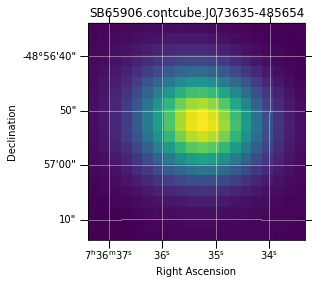

In [162]:
fig = plt.figure(figsize=(4,4)) 
ax = fig.add_subplot(1,1, 1, projection=w, slices=('x', 'y'))
ra = ax.coords[0]
dec = ax.coords[1]
ra.set_axislabel('Right Ascension')
dec.set_axislabel('Declination')
ax.coords.grid(color='white', alpha=0.5, linestyle='solid')
ax.imshow(i_data)
plt.title(source)
plt.show()

### Get some spectra 

In [163]:


#Take mean of central pixels for the spectrum
I = np.nanmean(fits.getdata(image_i)[:,9:11,9:11], axis=(1,2))
Q = np.nanmean(fits.getdata(image_q)[:,9:11,9:11], axis=(1,2))
U = np.nanmean(fits.getdata(image_u)[:,9:11,9:11], axis=(1,2))

# Take std of first row to get an uncertainty
di_spectrum = np.nanstd(fits.getdata(image_i)[:,0,:], axis=1)
dq_spectrum = np.nanstd(fits.getdata(image_q)[:,0,:], axis=1)
du_spectrum = np.nanstd(fits.getdata(image_u)[:,0,:], axis=1)

nus = getFrequencies(image_i)

#Remove nans in the spectra
nus = nus[~np.isnan(I)]
Q = Q[~np.isnan(I)]
U = U[~np.isnan(I)]

di_spectrum = di_spectrum[~np.isnan(I)]
dq_spectrum = dq_spectrum[~np.isnan(I)]
du_spectrum = du_spectrum[~np.isnan(I)]


PI = np.sqrt(np.array(Q)**2+np.array(U)**2)
I = I[~np.isnan(I)]


/Users/jenniferwest/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/jenniferwest/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/jenniferwest/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/jenniferwest/anaconda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


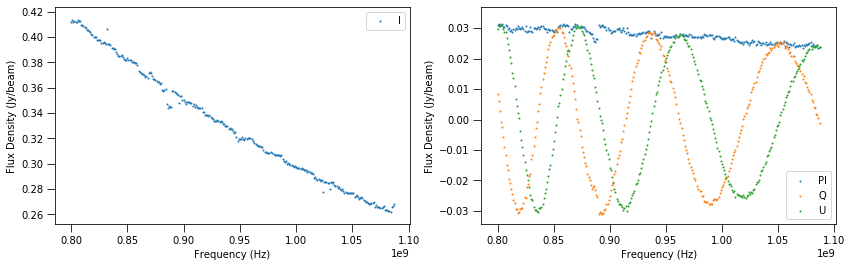

In [164]:
fluxunit= i_head["BUNIT"]

fig = plt.figure(figsize=(14,4))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(nus,I, label="I",s=1)
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel(f"Flux Density ({fluxunit})")

ax1.legend()
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(nus,PI, label="PI",s=1)
ax2.scatter(nus,Q, label="Q",s=1)
ax2.scatter(nus,U, label="U",s=1)
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel(f"Flux Density ({fluxunit})")
ax2.legend()

In [165]:
data=[nus,np.array(I),Q,U,di_spectrum,dq_spectrum,du_spectrum]

### Question: What happens when you turn off the Stokes I fitting?

> Trying [freq_Hz, I, Q, U, dI, dQ, dU] ... success.
Successfully read in the Stokes spectra.
Plotting the input data and spectral index fit.
PhiArr = -500.00 to 500.00 by 1.00 (1001 chans).
Weight type is 'variance'.
Calculating 1D RMSF and replicating along X & Y axes.
> RM-synthesis completed in 0.12 seconds.

--------------------------------------------------------------------------------
RESULTS:

FWHM RMSF = 59.04 rad/m^2
Pol Angle = 16.1 (+/-0.02806) deg
Pol Angle 0 = 153.6 (+/-0.1554) deg
Peak FD = -148.9 (+/-0.02891) rad/m^2
freq0_GHz = 0.9456 
I freq0 = 0.3246 mJy/beam
Peak PI = 0.02778 (+/-2.721e-05) mJy/beam
QU Noise = 0.0005133 mJy/beam
FDF Noise (theory)   = 2.721e-05 mJy/beam
FDF Noise (Corrected MAD) = 0.001846 mJy/beam
FDF SNR = 1021 
sigma_add(q) = 4.261 (+0.1976, -0.1846)
sigma_add(u) = 3.89 (+0.1814, -0.1694)
Fitted polynomial order = 2 

--------------------------------------------------------------------------------


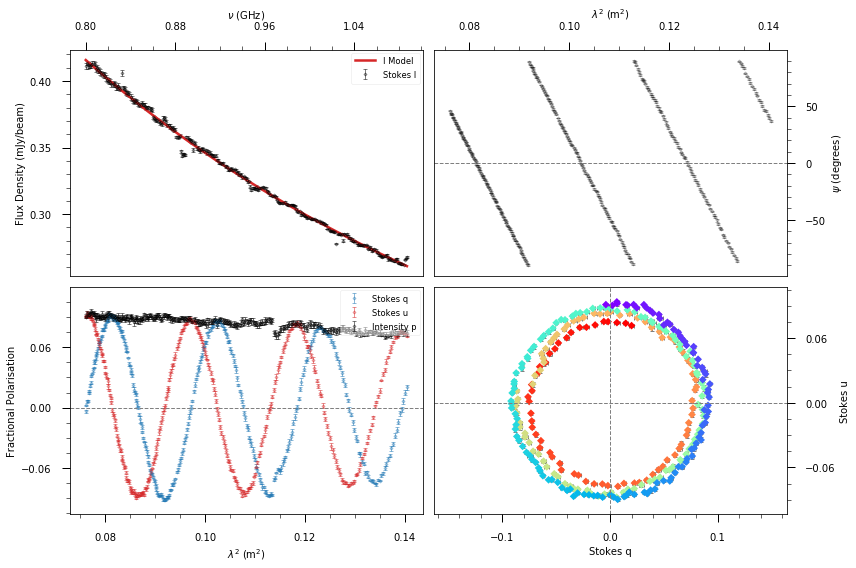

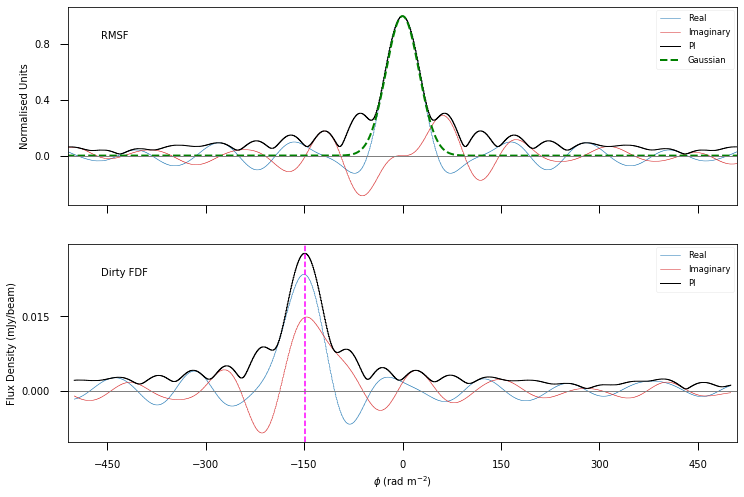

In [166]:
#Run RM-Synthesis using RM-Tools
rmdict, rmdata =rm1d.run_rmsynth(data, units="mJy/beam",verbose=True,showPlots=True,phiMax_radm2=500, dPhi_radm2=1,noStokesI=False )


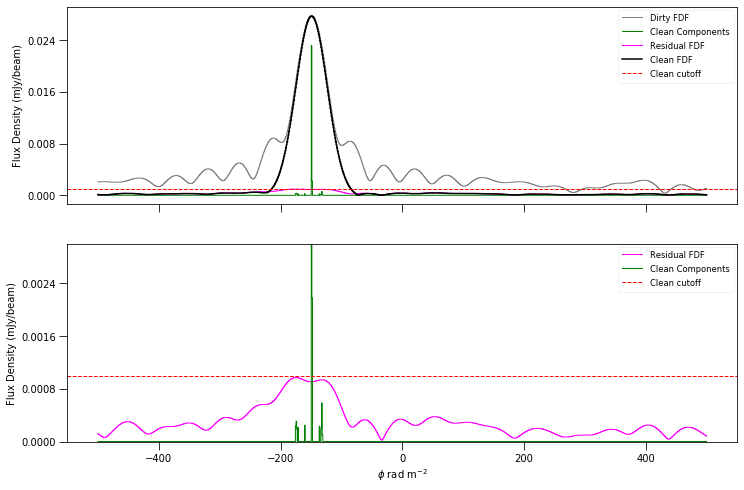

In [167]:
#Run RM-Clean using RM-Tools

#clean cutoff can be in Flux Density 
# or using number of sigma (indicated by negative values, i.e., -3 = 3 sigma)
cutoff=0.001
cleanDict, cleanData = rmclean.run_rmclean(rmdict, rmdata, cutoff, showPlots=True)



In [168]:
cleanDict

{'dFDFcorMAD': 0.00015680034994147718,
 'phiPeakPIfit_rm2': -148.9242806464328,
 'dPhiPeakPIfit_rm2': 0.02899612020398688,
 'ampPeakPIfit': 0.027698469278675527,
 'ampPeakPIfitEff': 0.02769843854140588,
 'dAmpPeakPIfit': 2.720893150341961e-05,
 'snrPIfit': 1017.9918044629717,
 'indxPeakPIfit': 351.0757193535672,
 'peakFDFimagFit': 0.014743271249335055,
 'peakFDFrealFit': 0.023446955133756643,
 'polAngleFit_deg': 16.080688236450484,
 'dPolAngleFit_deg': 0.02814157209414272,
 'polAngle0Fit_deg': 153.75032881478114,
 'dPolAngle0Fit_deg': 0.15585070454258623,
 'cleanCutoff': 0.001,
 'nIter': 37,
 'mom2CCFDF': 5.667323112487793,
 'dPhiObserved_rm2': 0.16709960824293538,
 'dAmpObserved': 0.00015680034994147718,
 'dPolAngleFitObserved_deg': 0.1621749957990931,
 'dPolAngleFit0Observed_deg': 0.8981405612282863}

In [156]:
#Find the non-zero clean components
phiArr = cleanData['phiArr_radm2']
ccArr = cleanData['ccArr']
phiArr[ccArr>0]

array([-175., -174., -173., -171., -160., -149., -148., -136., -133.,
       -132., -131.], dtype=float32)